## WGP Followup 
### Graphing
### Joining
### Explanatory Variables

This weeks lab has three different components.  

1) In the first component we will work on making a make a summary graph for the WGP study. This graph should show the three treatment arms with the levels of our outcomes, and include error bars.  In addition, we can work on customizing and saving our graph.  

2) In the second component, we will take the dataset that we have, and break it into the three rounds, and join them back together.  

3) Finally, we will start to look at data from the baseline that we had in Lab 3 and work to make an index that describes the houshehold characteristics.  We can also start to look at these variables in relation to our categorical outcome variables.  


In [1]:
# run this cell - obligatory imports in every file
from datascience import *
import pandas as pd
from pandas import read_stata
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

In [3]:
# read in stata data set using pandas ( pd) 
#pd.read_stata('stata.dta')
#pd.read_stata('bwm_child_EVDvars.dta')
WGP3rds_df = pd.DataFrame(pd.read_stata('WGP_3rounds_Data8.dta'))
WGP3rds_table= Table.from_df(WGP3rds_df)
#WGP_df.head(10)

In [4]:
WGPRd2 = WGP3rds_table.where("round",2).select("a1_cmpd_id",'treatment_arm','Selfrptpct', 'Vldclpct')
WGPRd2

a1_cmpd_id,treatment_arm,Selfrptpct,Vldclpct
515520,1,0,0
511903,1,0,0
501212,1,0,0
518908,1,0,0
511914,1,0,0
507017,1,0,0
508517,1,0,0
500436,1,100,100
501216,1,0,0
516119,1,0,0


In [5]:
# Lets group by treatment_arm take the means of each group
# This corresponds to the summary stats in Lab 5
round2_means = WGPRd2.group('treatment_arm', np.mean)
round2_means

treatment_arm,a1_cmpd_id mean,Selfrptpct mean,Vldclpct mean
1,508712,5.91716,3.5503
2,509444,13.1313,5.05051
3,469899,18,10.6667
4,470342,16.0377,12.2642
5,490193,58.7349,40.9639
6,443467,57.8652,38.2022
7,508978,67.4667,37.8667


In [23]:
# We have the means in a table, let's also make an array of these outcomes
# Save the means into an array for later use
round2_means_self_array = round2_means.column('Selfrptpct mean')
round2_means_vld_array = round2_means.column('Vldclpct mean')

In [7]:
#  Repeat this for the standard deviation
round2_stdev = WGPRd2.group('treatment_arm', np.std)
round2_stdev

treatment_arm,a1_cmpd_id std,Selfrptpct std,Vldclpct std
1,6335.01,23.5946,18.5047
2,6609.07,33.7742,21.8985
3,118392,38.4187,30.8689
4,119225,36.6956,32.8025
5,87578.4,49.2311,49.1767
6,149421,49.3775,48.5882
7,26783.1,46.8499,48.5055


In [8]:
# Get the number in each arm for adjusting the SD
round2_num= WGPRd2.group('treatment_arm')
round2_num

treatment_arm,count
1,169
2,99
3,150
4,106
5,332
6,356
7,375


In [9]:
# make an array of standard errors
round2_self_stdev_array= round2_stdev.column('Selfrptpct std')
print (round2_self_stdev_array)
# make an array of numbers n
round2_self_num_array = round2_num.column('count')
print (round2_self_num_array)
# make and array of the square root of n
round2_self_sqrtn_array = np.sqrt(round2_self_num_array)
print (round2_self_sqrtn_array)

[ 23.59456062  33.77424622  38.41874695  36.69556427  49.23109436
  49.3775177   46.84992981]
[169  99 150 106 332 356 375]
[ 13.           9.94987437  12.24744871  10.29563014  18.22086716
  18.86796226  19.36491673]


In [10]:
# Make the standard error dividing the SD by the square root of n
round2_self_se=np.divide(round2_self_stdev_array,round2_self_sqrtn_array)
print (round2_self_se)
round2_self_2se = round2_self_se*2
round2_self_2se

[ 1.8149662   3.39443946  3.13687755  3.56418828  2.70190732  2.6170032
  2.41931997]


array([ 3.6299324 ,  6.78887893,  6.27375511,  7.12837656,  5.40381464,
        5.23400641,  4.83863994])

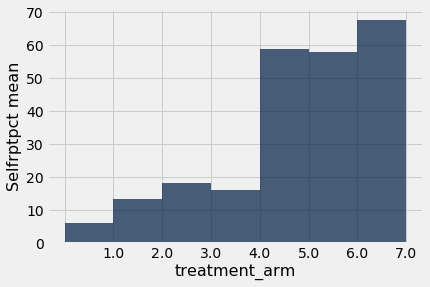

In [11]:
# first graph - bar chart 
round2_means.bar('treatment_arm','Selfrptpct mean') 

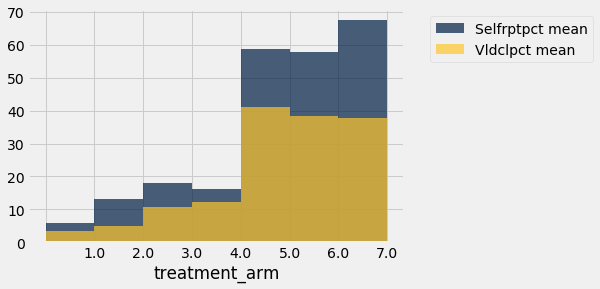

In [12]:
# bar chart with both self and validated 
round2_means.bar('treatment_arm',make_array(2, 3)) 

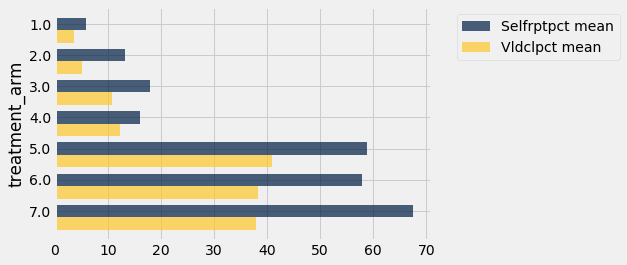

In [13]:
# Horizontal Bar Chart 
round2_means.barh('treatment_arm',make_array(2, 3)) 

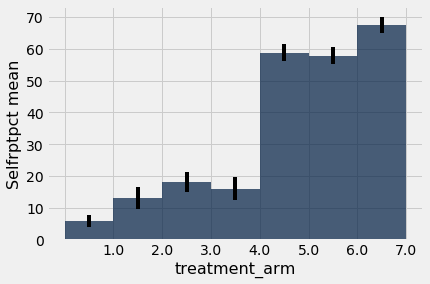

In [14]:
# Let's add in the error bars - adding in yerr= 
round2_means.bar('treatment_arm','Selfrptpct mean', yerr=round2_self_se) 

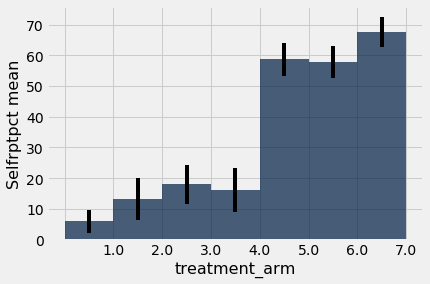

In [15]:
# Let's add in the error bars - adding in yerr= 2* SE - this would be the 95% Confidence Interval
round2_means.bar('treatment_arm','Selfrptpct mean', yerr=round2_self_2se) 

In [17]:
# redoing it for round 3
WGPRd3 = WGP3rds_table.where("round",3).select("a1_cmpd_id",'treatment_arm','Selfrptpct', 'Vldclpct')
round3_means = WGPRd3.group('treatment_arm', np.mean)

# array of means
round3_means_array = round3_means.column('Selfrptpct mean')
print(round3_means_array)
round3_stdev = WGPRd3.group('treatment_arm', np.std)
round3_num= WGPRd3.group('treatment_arm')
# make an array of standard errors
round3_self_stdev_array= round3_stdev.column('Selfrptpct std')
round3_self_num_array = round3_num.column('count')
round3_self_sqrtn_array = np.sqrt(round2_self_num_array)
#print (round2_self_sqrtn_array)
round3_self_se=np.divide(round3_self_stdev_array,round3_self_sqrtn_array)
print (round3_self_se)
round3_self_2se = round3_self_se*2
round3_self_2se

[ 10.5882349   17.1875      11.03448296  13.55932236  47.01986694
  49.71590805  72.3837204 ]
[ 2.3668229   3.79172392  2.55823952  3.32525612  2.73922802  2.64995204
  2.30880556]


array([ 4.73364581,  7.58344784,  5.11647903,  6.65051224,  5.47845605,
        5.29990408,  4.61761112])

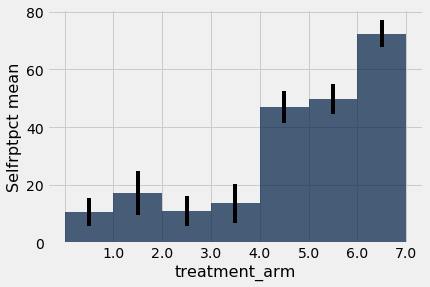

In [18]:
# Round 3 Graph
round3_means.bar('treatment_arm','Selfrptpct mean', yerr=round3_self_2se) 

## Question 1 Make another graph 
Make another graph similar but different to the previous 6 ones above, that 
- uses the Validated means and Confidence Intervals 
- looks awesome ( change the colors, choose the orientation, think about what you wish it looked like)
- Add a short paragraph of explanation - what can you summarize from looking at the error bars in your graph?

In [19]:
#  add code here 

Write a short paragraph explaining and interpereting your graph

## Practice with pyplot & Matplotlib

In [20]:
# This is just to check our inputs in to the more complicated graph in the following cell
#print(round2_means_array,round2_self_stderr_array )
# Shouldnt be necessary, but in case you have problems

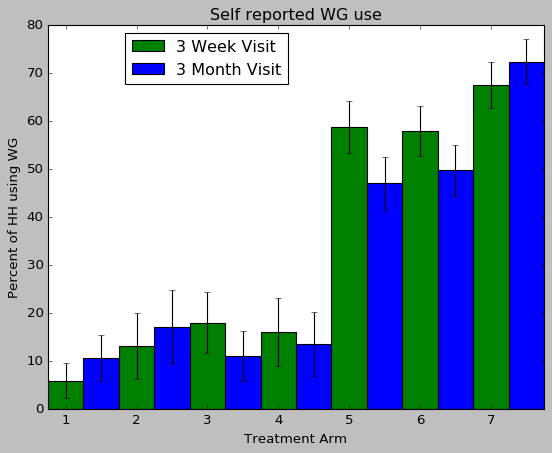

In [25]:
# Now we can make a graph that compares round 2 and round 3 
# This is a more complicated graphing using Matplotlib

# following from https://matplotlib.org/gallery/api/barchart.html
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
#plt.style.use('fivethirtyeight')
plt.style.use('classic')

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, round2_means_self_array, width, color='g', yerr=round2_self_2se)

rects2 = ax.bar(ind + width, round3_means_array, width, color='b', yerr=round3_self_2se)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent of HH using WG')
ax.set_title('Self reported WG use')
ax.set_xlabel('Treatment Arm')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6','7'))

ax.legend((rects1[0], rects2[0])
          ,('3 Week Visit', '3 Month Visit')
          ,bbox_to_anchor=(0.5, 1.0))

plt.savefig("test.png")

plt.show()


## Question 2 Make another Version 
Make another graph similar but different to the one above, but for Validated
- go to the two web links above and read about different themes and settings
- change the colors, where the legend boxes are, change the title 
- change the filename of the saved png file. Import this into a document and write a paragraph explaining the graph and save this file as a separate pdf for submission.  

In [26]:
# Copy the whole huge plot cell above into this cell before starting to make changes

##  Part 3  join to make a horizontal dataset
- make a separate table for each Round of data (1,2,3) 
- join them by a1_cmpd_id


In [27]:
# for now I am leaving all the data in Round 1
WGP_Round1 = WGP3rds_table.where("round",1)
#WGP_Round1
WGP_Round1.group('treatment_arm')

treatment_arm,count
1,137
2,118
3,115
4,120
5,341
6,337
7,335


In [28]:
# In Round 2 we can just do a subset of the data
WGP_Round2 = WGP3rds_table.where("round",2).select("a1_cmpd_id",'treatment_arm','Selfrptpct', 'Vldclpct')
#WGP_Round2
WGP_Round2.group('treatment_arm')

treatment_arm,count
1,169
2,99
3,150
4,106
5,332
6,356
7,375


In [29]:
WGP_Round3 = WGP3rds_table.where("round",3).select("a1_cmpd_id",'treatment_arm','Selfrptpct', 'Vldclpct')

WGP_Round3.group('treatment_arm')
#WGP_Round3.group('Selfrptpct3')

treatment_arm,count
1,170
2,128
3,145
4,118
5,302
6,352
7,344


In [35]:
# Join Round 1 and 2 using the join command and using the column 'a1_cmpd_id'
Table_Round1and2_Wide = WGP_Round1.join('a1_cmpd_id', WGP_Round2)
#Table_Round1and2_Wide
# When the join finds a column name repeated - it renames it with a _2 subscript

Table_Round1and2_Wide.group('Selfrptpct_2')


Selfrptpct_2,count
0,615
100,647


In [36]:
# Join again with Round 3 data
Table_Round123_Wide = Table_Round1and2_Wide.join('a1_cmpd_id', WGP_Round3)
Table_Round123_Wide
print (Table_Round123_Wide.group('Selfrptpct_3'))


Selfrptpct_3 | count
0            | 575
100          | 485


In [37]:
# This is who we have for all 3 rounds
Table_Round123_Wide.group('treatment_arm')

treatment_arm,count
1,105
2,90
3,86
4,93
5,220
6,245
7,221


In [38]:
# This table is really interesting - what does it mean?
print (Table_Round123_Wide.group('Selfrptpct_3'))
Table_Round123_Wide.pivot('Selfrptpct_3','Selfrptpct_2')
#Table_Round123_Wide.pivot('Vldclpct_3','Vldclpct_2')

Selfrptpct_3 | count
0            | 575
100          | 485


Selfrptpct_2,0.0,100.0
0,401,128
100,174,357


## Question 3.1 - discuss the previous table, what does it mean?

add your answer here

In [39]:
# Now we can try to look at baseline explanatory variables how about an Index of durable goods?
# It might be worth it to look back at Lab 3 
Durable = Table_Round123_Wide.column('d1_concrete_floor')+Table_Round123_Wide.column('d2_elect_d')+Table_Round123_Wide.column('d3_latr_d')+Table_Round123_Wide.column('d10a_bike_d')+Table_Round123_Wide.column('d10b_keros_d')+Table_Round123_Wide.column('d10c_radio_d')+Table_Round123_Wide.column('d10f_sofa_d')+Table_Round123_Wide.column('d11_ironroof_d')
Durable

array([ 7.,  1.,  4., ...,  4.,  6.,  6.], dtype=float32)

In [40]:
Table_Round123_Wide.append_column('durable',Durable)
#Table_Round123_Wide

In [41]:
# Uh Oh - There are a bunch of missing variables 'Nan' that will mess up our graphs
Table_Round123_Wide.group('durable').show()

durable,count
0,15
1,59
2,111
3,195
4,244
5,245
6,151
7,35
nan,1
nan,1


In [42]:
# Lest get rid of the 'nan' and turn those into zeroes
Table_Round123_Wide.append_column('durable_nonan',np.nan_to_num(Durable))
Table_Round123_Wide.group('durable_nonan')

durable_nonan,count
0,20
1,59
2,111
3,195
4,244
5,245
6,151
7,35


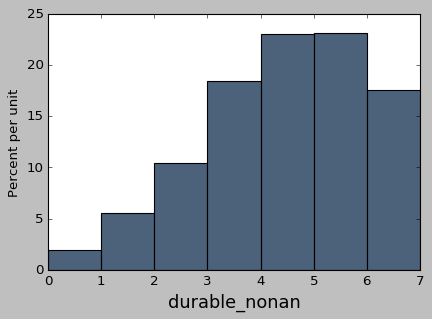

In [43]:
# Histogram of Durable good composite index ownership
# Think about how to interperet this
Table_Round123_Wide.hist('durable_nonan', bins=7)

b9_education_nonan,count
0,169
1,12
2,30
3,53
4,65
4.5,1
5,89
6,119
7,195
8,179


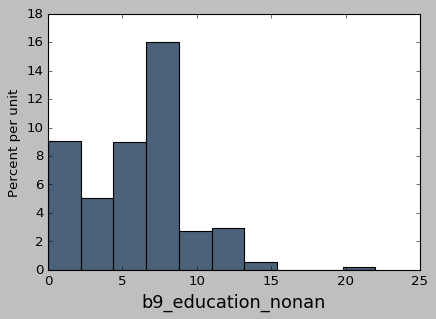

In [44]:
# Lets look at education levels
b9_education_array=Table_Round123_Wide.column('b9_education')
# There are also nan values that we wil make into zeroes
Table_Round123_Wide.append_column('b9_education_nonan',np.nan_to_num(b9_education_array))
Table_Round123_Wide.group('b9_education_nonan').show()
Table_Round123_Wide.hist('b9_education_nonan')

b3_age_nonan,count
0,44
15,1
16,3
17,5
18,14
19,28
20,33
21,34
22,43
23,37


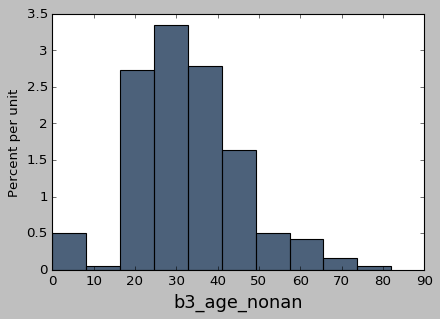

In [45]:
# Finally lets make up an ages variable
b3_birth_year_array=Table_Round123_Wide.column('b3_birth_year')
# There is a problem with mising values where some ages are 9999
# Which is missing value code from Data Entry
b3_birth_year_array[b3_birth_year_array>2000]=2008
# Lets make the age by subtracting birth year from survey year
b3_age_array=2008-b3_birth_year_array
Table_Round123_Wide.append_column('b3_age_nonan',np.nan_to_num(b3_age_array))
Table_Round123_Wide.group('b3_age_nonan').show(10)
Table_Round123_Wide.hist('b3_age_nonan')

## Question 3.2 - discuss the previous histograms, write a paragraph
- what is the apparent median, and mode
- what did replacing missing values with zeroes do
- How would we expect these variables to interact with behavior change and technology adoption?

## In the next section we will look at histograms of households who use WG vs households who do not use WG - and compare them by the baseline variables that we just created.

Selfrptpct_2 | count
0            | 529
100          | 531


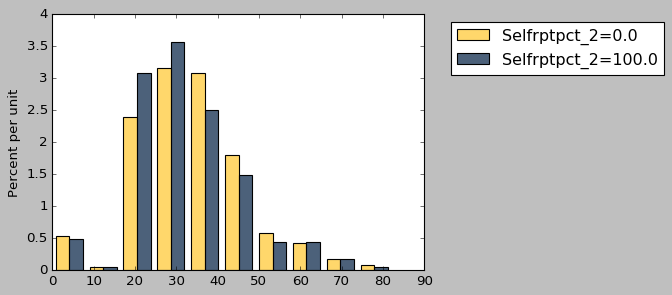

In [46]:
# across all the households in round 2 - it looks like 50% are self reporting use
print(Table_Round123_Wide.group('Selfrptpct_2'))
# Age vs Self reported use
Table_Round123_Wide.hist('b3_age_nonan', group='Selfrptpct_2', side_by_side=True )

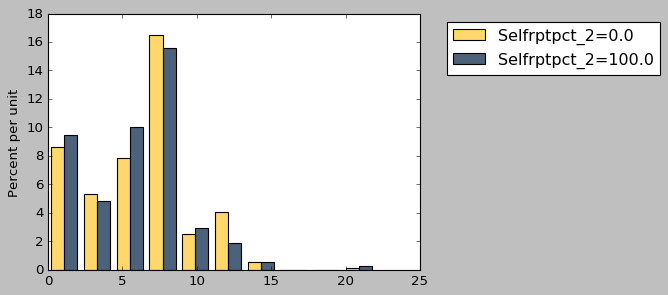

In [47]:
# Education vs Self Reported use
Table_Round123_Wide.hist('b9_education_nonan', group='Selfrptpct_2', side_by_side=True)

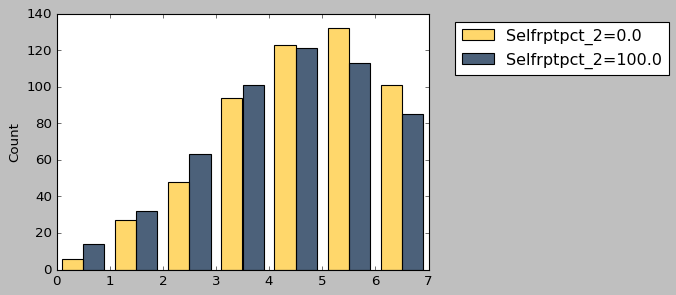

In [48]:
# Durable Good Index vs Self Reported Use
Table_Round123_Wide.hist('durable_nonan',
                         group='Selfrptpct_2', 
                         side_by_side=True, 
                         bins=7, 
                         normed=False)

Selfrptpct_2 | count
0            | 207
100          | 479


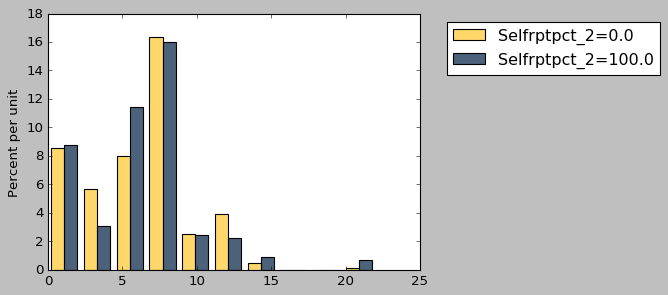

In [49]:
# What if we restrict it to the high uptake arms - 5, 6, 7
print(Table_Round123_Wide.where('treatment_arm',are.above(4)).group('Selfrptpct_2'))
Table_Round123_Wide.where('treatment_arm',are.above(4)).hist('b9_education_nonan',
                                                             group='Selfrptpct_2', side_by_side=True, )

## Question 3.3 - discuss the previous histograms, write a paragraph
- Are there any patterns to notice that these background baseline variables appear to explain who is using WG?
- What is another way to test these interactions?